# Calculating simple 
- Pct change
- Log returns
- Standard deviation (Volatility)
- Rolling
    - Simple Moving Avarage
    - Exponential Moving Average
- Portfolio and return

### Standard deviation

- $\sigma_{p} = \sigma_{daily}\times \sqrt{p}$
- $\sigma_{annually} = \sigma_{daily}\times \sqrt{252}$
 
    *(252 trading days per year)*

In [57]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

In [58]:
tickers = ['BTC=F', 'BTC-CAD', 'BTC-USD', 'BTC-EUR']
start = dt.datetime(2021, 1, 4)
data = pdr.get_data_yahoo(tickers, start)

In [59]:
data.head()

Attributes Adj Close                                              Close  \
Symbols        BTC=F       BTC-CAD       BTC-USD       BTC-EUR    BTC=F   
Date                                                                      
2021-01-04   31550.0  40865.062500  31971.914062  26094.005859  31550.0   
2021-01-05   34515.0  43089.992188  33992.429688  27639.482422  34515.0   
2021-01-06   36565.0  46641.222656  36824.363281  29844.859375  36565.0   
2021-01-07   39625.0  49945.906250  39371.042969  32089.447266  39625.0   
2021-01-08   39520.0  51769.027344  40797.609375  33372.281250  39520.0   

Attributes                                               High                \
Symbols          BTC-CAD       BTC-USD       BTC-EUR    BTC=F       BTC-CAD   
Date                                                                          
2021-01-04  40865.062500  31971.914062  26094.005859  34170.0  42467.906250   
2021-01-05  43089.992188  33992.429688  27639.482422  34680.0  43642.414062   
2021-01-06  46641.222656  36824.363281  29844.859375  37035.0  46711.308594   
2021-01-07  49945.906250  39371.042969  32089.447266  41000.0  51054.824219   
2021-01-08  51769.027344  40797.609375  33372.281250  42730.0  53271.730469   

Attributes  ...           Low                   Open                \
Symbols     ...       BTC-USD       BTC-EUR    BTC=F       BTC-CAD   
Date        ...                                                      
2021-01-04  ...  28722.755859  23363.980469  33405.0  41747.992188   
2021-01-05  ...  30221.187500  24633.167969  31655.0  40871.613281   
2021-01-06  ...  33514.035156  27254.718750  34655.0  43116.847656   
2021-01-07  ...  36491.191406  29653.542969  36445.0  46653.269531   
2021-01-08  ...  36838.636719  30048.318359  40275.0  49959.511719   

Attributes                               Volume                              \
Symbols          BTC-USD       BTC-EUR    BTC=F       BTC-CAD       BTC-USD   
Date                                                                          
2021-01-04  32810.949219  26784.332031  14997.0  1.037395e+11  8.116348e+10   
2021-01-05  31977.041016  26098.189453   8153.0  8.562535e+10  6.754732e+10   
2021-01-06  34013.613281  27656.708984  19469.0  9.536054e+10  7.528943e+10   
2021-01-07  36833.875000  29852.566406  16834.0  1.075288e+11  8.476214e+10   
2021-01-08  39381.765625  32098.187500  15379.0  1.118017e+11  8.810752e+10   

Attributes                
Symbols          BTC-EUR  
Date                      
2021-01-04  6.624190e+10  
2021-01-05  5.492320e+10  
2021-01-06  6.101945e+10  
2021-01-07  6.908555e+10  
2021-01-08  7.207160e+10  

[5 rows x 24 columns]

### Bitcoin 

In [60]:
data = data['Adj Close']

In [61]:
data

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR
Date,,,,
2021-01-04,31550.0,40865.062500,31971.914062,26094.005859
2021-01-05,34515.0,43089.992188,33992.429688,27639.482422
2021-01-06,36565.0,46641.222656,36824.363281,29844.859375
2021-01-07,39625.0,49945.906250,39371.042969,32089.447266
2021-01-08,39520.0,51769.027344,40797.609375,33372.281250
...,...,...,...,...
2022-07-31,NaN,29905.228516,23336.896484,22855.736328
2022-08-01,23030.0,29944.361328,23314.199219,22720.060547
2022-08-02,23000.0,29613.046875,22978.117188,22626.390625


In [62]:
data['%-chg'] = data['BTC-CAD'].pct_change()

In [63]:
data['%-chg']

Date
2021-01-04         NaN
2021-01-05    0.054446
2021-01-06    0.082414
2021-01-07    0.070853
2021-01-08    0.036502
                ...   
2022-07-31   -0.012008
2022-08-01    0.001309
2022-08-02   -0.011064
2022-08-03   -0.008206
2022-08-04    0.001850
Name: %-chg, Length: 578, dtype: float64

In [64]:
data.head()

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR,%-chg
Date,,,,,
2021-01-04,31550.0,40865.062500,31971.914062,26094.005859,NaN
2021-01-05,34515.0,43089.992188,33992.429688,27639.482422,0.054446
2021-01-06,36565.0,46641.222656,36824.363281,29844.859375,0.082414
2021-01-07,39625.0,49945.906250,39371.042969,32089.447266,0.070853
2021-01-08,39520.0,51769.027344,40797.609375,33372.281250,0.036502


In [65]:
import numpy as np

In [66]:
data['Log returns'] = np.log(data['BTC-CAD']/data['BTC-CAD'].shift())

In [67]:
data['BTC-CAD']/data['BTC-CAD'].shift()

Date
2021-01-04         NaN
2021-01-05    1.054446
2021-01-06    1.082414
2021-01-07    1.070853
2021-01-08    1.036502
                ...   
2022-07-31    0.987992
2022-08-01    1.001309
2022-08-02    0.988936
2022-08-03    0.991794
2022-08-04    1.001850
Name: BTC-CAD, Length: 578, dtype: float64

In [68]:
data.head()

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR,%-chg,Log returns
Date,,,,,,
2021-01-04,31550.0,40865.062500,31971.914062,26094.005859,NaN,NaN
2021-01-05,34515.0,43089.992188,33992.429688,27639.482422,0.054446,0.053015
2021-01-06,36565.0,46641.222656,36824.363281,29844.859375,0.082414,0.079194
2021-01-07,39625.0,49945.906250,39371.042969,32089.447266,0.070853,0.068456
2021-01-08,39520.0,51769.027344,40797.609375,33372.281250,0.036502,0.035851


In [69]:
data['Log returns'].std()

0.03916794790955912

#### Annual volatility  $ \sqrt{252}$

In [70]:
volatility = data['Log returns'].std()*252**.5

In [71]:
volatility

0.6217718972005538

In [72]:
l = round(volatility, 4)*100

In [73]:
l

62.18

In [74]:
type(l)

numpy.float64

In [75]:
str_vol = str(round(volatility, 4)*100)

In [76]:
type(str_vol)

str

In [77]:
str_vol

'62.18'

<IPython.core.display.Javascript object>


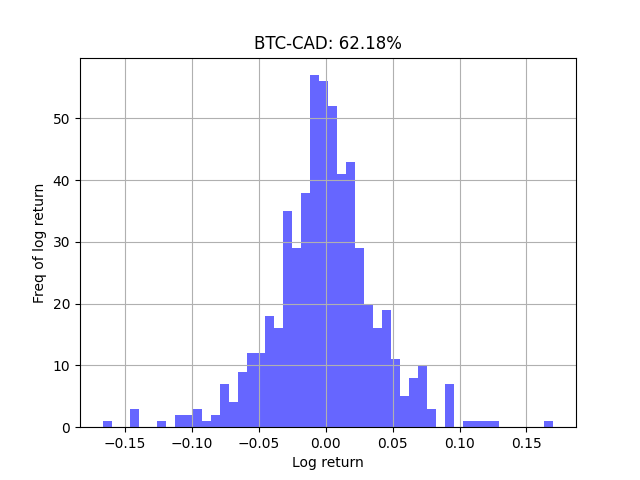

Text(0.5, 1.0, 'BTC-CAD: 62.18%')

In [78]:
fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title("BTC-CAD: " + str_vol + "%")

In [80]:
data.head()

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR,%-chg,Log returns
Date,,,,,,
2021-01-04,31550.0,40865.062500,31971.914062,26094.005859,NaN,NaN
2021-01-05,34515.0,43089.992188,33992.429688,27639.482422,0.054446,0.053015
2021-01-06,36565.0,46641.222656,36824.363281,29844.859375,0.082414,0.079194
2021-01-07,39625.0,49945.906250,39371.042969,32089.447266,0.070853,0.068456
2021-01-08,39520.0,51769.027344,40797.609375,33372.281250,0.036502,0.035851


In [81]:
data['MA10'] = data['BTC-CAD'].rolling(10).mean()

In [82]:
data.tail()

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR,%-chg,Log returns,MA10
Date,,,,,,,
2022-07-31,NaN,29905.228516,23336.896484,22855.736328,-0.012008,-0.012081,29294.610938
2022-08-01,23030.0,29944.361328,23314.199219,22720.060547,0.001309,0.001308,29355.112305
2022-08-02,23000.0,29613.046875,22978.117188,22626.390625,-0.011064,-0.011126,29414.708594
2022-08-03,23540.0,29370.029297,22846.507812,22494.580078,-0.008206,-0.008240,29429.266797
2022-08-04,22905.0,29424.373047,22888.494141,22413.650391,0.001850,0.001849,29626.373047


In [83]:
data['EMA10'] = data['BTC-CAD'].ewm(span=10, adjust=False).mean()

In [84]:
data.tail()

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR,%-chg,Log returns,MA10,EMA10
Date,,,,,,,,
2022-07-31,NaN,29905.228516,23336.896484,22855.736328,-0.012008,-0.012081,29294.610938,29474.081538
2022-08-01,23030.0,29944.361328,23314.199219,22720.060547,0.001309,0.001308,29355.112305,29559.586954
2022-08-02,23000.0,29613.046875,22978.117188,22626.390625,-0.011064,-0.011126,29414.708594,29569.306940
2022-08-03,23540.0,29370.029297,22846.507812,22494.580078,-0.008206,-0.008240,29429.266797,29533.074641
2022-08-04,22905.0,29424.373047,22888.494141,22413.650391,0.001850,0.001849,29626.373047,29513.310715


<IPython.core.display.Javascript object>


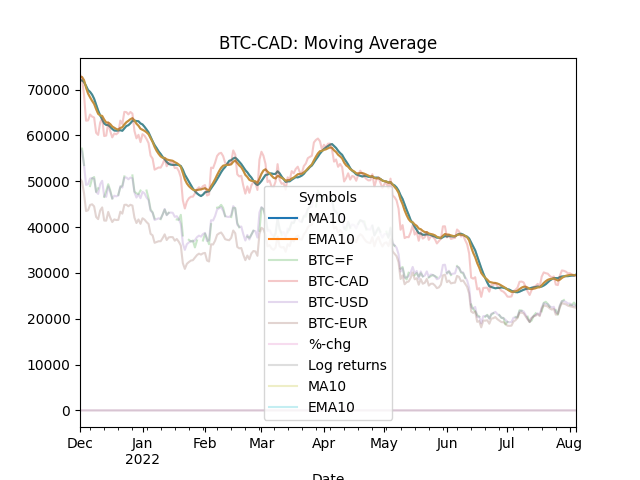

Text(0.5, 1.0, 'BTC-CAD: Moving Average')

In [85]:
fig, ax = plt.subplots()
data[['MA10', 'EMA10']].loc['2021-12-01':].plot(ax=ax)
data.loc['2021-12-01':].plot(ax=ax, alpha=0.25)
ax.set_title("BTC-CAD: Moving Average")

In [87]:
portfolios = [.25, .25, .25, .25]

In [88]:
np.sum(portfolios)

1.0

In [89]:
data/data.iloc[0]

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR,%-chg,Log returns,MA10,EMA10
Date,,,,,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000
2021-01-05,1.093978,1.054446,1.063197,1.059227,NaN,NaN,NaN,1.009899
2021-01-06,1.158954,1.141347,1.151772,1.143744,NaN,NaN,NaN,1.033799
2021-01-07,1.255943,1.222215,1.231426,1.229763,NaN,NaN,NaN,1.068056
2021-01-08,1.252615,1.266829,1.276045,1.278925,NaN,NaN,NaN,1.104197
...,...,...,...,...,...,...,...,...
2022-07-31,NaN,0.731804,0.729919,0.875900,NaN,NaN,NaN,0.721254
2022-08-01,0.729952,0.732762,0.729209,0.870700,NaN,NaN,NaN,0.723346
2022-08-02,0.729002,0.724654,0.718697,0.867111,NaN,NaN,NaN,0.723584


In [90]:
df = pd.DataFrame(data)

In [91]:
df

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR,%-chg,Log returns,MA10,EMA10
Date,,,,,,,,
2021-01-04,31550.0,40865.062500,31971.914062,26094.005859,NaN,NaN,NaN,40865.062500
2021-01-05,34515.0,43089.992188,33992.429688,27639.482422,0.054446,0.053015,NaN,41269.595170
2021-01-06,36565.0,46641.222656,36824.363281,29844.859375,0.082414,0.079194,NaN,42246.254713
2021-01-07,39625.0,49945.906250,39371.042969,32089.447266,0.070853,0.068456,NaN,43646.191356
2021-01-08,39520.0,51769.027344,40797.609375,33372.281250,0.036502,0.035851,NaN,45123.070627
...,...,...,...,...,...,...,...,...
2022-07-31,NaN,29905.228516,23336.896484,22855.736328,-0.012008,-0.012081,29294.610938,29474.081538
2022-08-01,23030.0,29944.361328,23314.199219,22720.060547,0.001309,0.001308,29355.112305,29559.586954
2022-08-02,23000.0,29613.046875,22978.117188,22626.390625,-0.011064,-0.011126,29414.708594,29569.306940


In [92]:
data = df.drop(['%-chg','Log returns','MA10','EMA10'], axis=1)

In [93]:
data

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR
Date,,,,
2021-01-04,31550.0,40865.062500,31971.914062,26094.005859
2021-01-05,34515.0,43089.992188,33992.429688,27639.482422
2021-01-06,36565.0,46641.222656,36824.363281,29844.859375
2021-01-07,39625.0,49945.906250,39371.042969,32089.447266
2021-01-08,39520.0,51769.027344,40797.609375,33372.281250
...,...,...,...,...
2022-07-31,NaN,29905.228516,23336.896484,22855.736328
2022-08-01,23030.0,29944.361328,23314.199219,22720.060547
2022-08-02,23000.0,29613.046875,22978.117188,22626.390625


### Return of 100,000 on a Bitcoin portfolio  

In [94]:
(data/data.iloc[0])*portfolios*100000

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR
Date,,,,
2021-01-04,25000.000000,25000.000000,25000.000000,25000.000000
2021-01-05,27349.445325,26361.144185,26579.914500,26480.681589
2021-01-06,28973.851030,28533.678773,28794.306160,28593.596874
2021-01-07,31398.573693,30555.383495,30785.647437,30744.079156
2021-01-08,31315.372425,31670.713427,31901.131486,31973.129605
...,...,...,...,...
2022-07-31,NaN,18295.107536,18247.966355,21897.496739
2022-08-01,18248.811410,18319.047798,18230.218539,21767.509241
2022-08-02,18225.039620,18116.359711,17967.423801,21677.766483


In [95]:
portfolios

[0.25, 0.25, 0.25, 0.25]

In [96]:
portfoliod = np.sum((data/data.iloc[0])*portfolios*100000, axis=1)
portfoliod

Date
2021-01-04    100000.000000
2021-01-05    106771.185599
2021-01-06    114895.432837
2021-01-07    123483.683781
2021-01-08    126860.346942
                  ...      
2022-07-31     58440.570629
2022-08-01     76565.586988
2022-08-02     75986.589615
2022-08-03     76036.616638
2022-08-04     75521.986885
Length: 578, dtype: float64

In [97]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.20788007, 0.02358942, 0.31608719, 0.45244332])

In [98]:
weight.sum()

1.0

In [99]:
weighted = np.sum((data/data.iloc[0])*weight*100000, axis=1)
weighted

Date
2021-01-04    100000.000000
2021-01-05    106759.306766
2021-01-06    114938.689344
2021-01-07    123555.294030
2021-01-08    127226.013952
                  ...      
2022-07-31     64427.581730
2022-08-01     79346.410365
2022-08-02     78812.840216
2022-08-03     78795.952769
2022-08-04     78281.879649
Length: 578, dtype: float64

In [100]:
a=portfoliod.iloc[-3]
a

75986.58961485467

In [101]:
b=weighted.iloc[-3]
b

78812.84021579329

In [102]:
c=a-b
c

-2826.2506009386125

In [103]:
c/a

-0.037194070891505136

### Conclusion

In this scenario an equal portfolio distribution among the four bitcoin shares yields a loss of 0.8% compared to a random distribution where almost 70% is put down on BIT-USD

### Monte Carlo Simulation of Sharpe Ratio

In [119]:
log_returns = np.log(data/data.shift())

In [120]:
log_returns

Symbols,BTC=F,BTC-CAD,BTC-USD,BTC-EUR
Date,,,,
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,0.089820,0.053015,0.061280,0.057540
2021-01-06,0.057697,0.079194,0.080022,0.076767
2021-01-07,0.080369,0.068456,0.066871,0.072515
2021-01-08,-0.002653,0.035851,0.035593,0.039198
...,...,...,...,...
2022-07-31,NaN,-0.012081,-0.013590,-0.012047
2022-08-01,NaN,0.001308,-0.000973,-0.005954
2022-08-02,-0.001303,-0.011126,-0.014520,-0.004131


In [121]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.20373034, 0.04146654, 0.29594553, 0.45885759])

In [122]:
exp_rtn = np.sum(log_returns.mean()*weight)*252

In [123]:
exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))

In [124]:
sharpe_ratio = exp_rtn / exp_vol

In [125]:
sharpe_ratio

-0.11716302838020992

In [126]:
# Monte Carlo Simulation
n = 5000

weights = np.zeros((n, 4))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(4)
    weight /= weight.sum()
    weights[i] = weight
    
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

In [127]:
sharpe_ratios.max()

0.009727295525294272

In [128]:
sharpe_ratios.argmax()

3836

In [131]:
weights[3836]

array([0.83606749, 0.10690471, 0.04892136, 0.00810644])

<IPython.core.display.Javascript object>


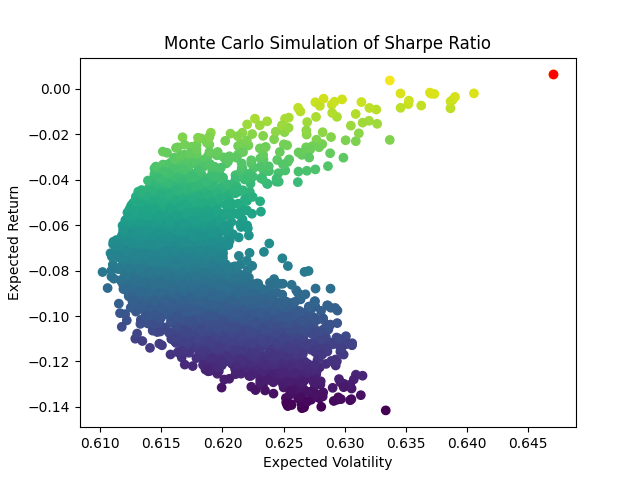

Text(0.5, 1.0, 'Monte Carlo Simulation of Sharpe Ratio')

In [130]:
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')
ax.set_title("Monte Carlo Simulation of Sharpe Ratio")

### Conclusion

A monte carlo simulation of 5000 iterations depicts an optimum Sharpe Ratio of about 0.01 and to place 100,000 across the portfolio BTC=F, BTC-CAD, BTC-USD, BTC-EUR with 83606.74, 10690.49, 4892.13, 810.64, respectively.